In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [426]:
df = pd.read_csv('weather_data.csv')

In [427]:
df.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,winddirection_10m,surface_pressure,cloudcover,city
0,2026-01-17 00:00:00,7.4,0.1,91,9.7,129,1008.9,100,Edinburgh
1,2026-01-17 01:00:00,7.7,0.1,91,8.9,133,1009.0,100,Edinburgh
2,2026-01-17 02:00:00,7.9,0.1,91,7.9,133,1009.3,100,Edinburgh
3,2026-01-17 03:00:00,7.8,0.0,91,8.4,133,1008.7,100,Edinburgh
4,2026-01-17 04:00:00,7.8,0.0,91,7.4,133,1009.6,100,Edinburgh


In [428]:
df = df.rename(columns={'temperature_2m':'temperature','relativehumidity_2m': 'relative_humidity','windspeed_10m':'wind_speed','winddirection_10m':'wind_direction'})

In [429]:
df.shape

(174720, 9)

In [430]:
df.isna().sum()

time                 0
temperature          0
precipitation        0
relative_humidity    0
wind_speed           0
wind_direction       0
surface_pressure     0
cloudcover           0
city                 0
dtype: int64

In [431]:
df.duplicated().sum()

np.int64(0)

In [432]:
df.describe()

,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover
count,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000,174720.000000
mean,8.273214,0.100595,87.142857,10.002976,130.404762,1003.048214,93.714286
std,1.188363,0.247968,5.791313,4.015094,31.769206,11.431886,10.231367
min,4.600000,0.000000,70.000000,2.700000,59.000000,986.500000,51.000000
25%,7.500000,0.000000,84.000000,6.800000,113.750000,989.675000,92.750000
50%,8.300000,0.000000,88.000000,9.050000,133.500000,1008.800000,98.000000
75%,8.900000,0.100000,91.000000,13.250000,151.250000,1012.825000,100.000000
max,10.900000,1.200000,96.000000,19.400000,193.000000,1017.800000,100.000000


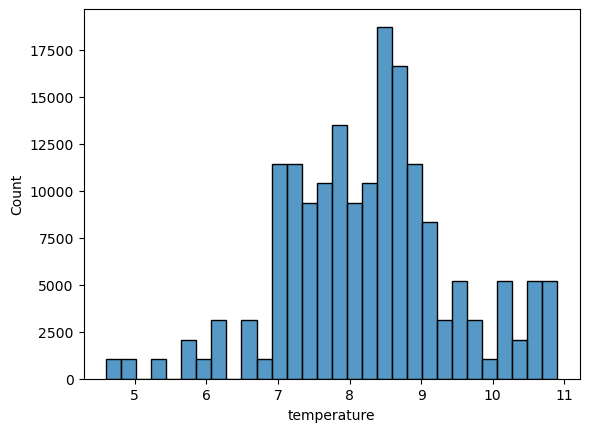

In [433]:
sns.histplot(df['temperature'], bins = 30)
plt.show()

In [434]:
df.head()

,time,temperature,precipitation,relative_humidity,wind_speed,wind_direction,surface_pressure,cloudcover,city
0,2026-01-17 00:00:00,7.4,0.1,91,9.7,129,1008.9,100,Edinburgh
1,2026-01-17 01:00:00,7.7,0.1,91,8.9,133,1009.0,100,Edinburgh
2,2026-01-17 02:00:00,7.9,0.1,91,7.9,133,1009.3,100,Edinburgh
3,2026-01-17 03:00:00,7.8,0.0,91,8.4,133,1008.7,100,Edinburgh
4,2026-01-17 04:00:00,7.8,0.0,91,7.4,133,1009.6,100,Edinburgh


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174720 entries, 0 to 174719
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time               174720 non-null  object 
 1   temperature        174720 non-null  float64
 2   precipitation      174720 non-null  float64
 3   relative_humidity  174720 non-null  int64  
 4   wind_speed         174720 non-null  float64
 5   wind_direction     174720 non-null  int64  
 6   surface_pressure   174720 non-null  float64
 7   cloudcover         174720 non-null  int64  
 8   city               174720 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 12.0+ MB


In [436]:
df['time']=pd.to_datetime(df['time'])

In [437]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 24)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 24)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 24)

In [438]:
df['temp_1h'] = df['temperature'].shift(1)  
df['temp_2h'] = df['temperature'].shift(2)  
df['temp_target'] = df['temperature'].shift(-24)

df = df.dropna()

In [439]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [440]:
y = df['temp_target']

x = df.drop(columns=['temperature', 'temp_target', 'time', 'hour','temp_2h','temp_1h','day','month'])


In [441]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [442]:
x.columns

Index(['precipitation', 'relative_humidity', 'wind_speed', 'wind_direction',
       'surface_pressure', 'cloudcover', 'city'],
      dtype='object')

In [443]:
train_len = int(0.8 * len(df))
val_len = int(0.9 * len(df))

print(train_len)
print(val_len)
print(len(df))
x_train = x[:train_len]
y_train = y[:train_len]

x_val = x[train_len : val_len]
y_val = y[train_len : val_len]

x_test = x[val_len: ]
y_test = y[val_len: ]

139755
157224
174694


In [444]:
num_cols = x.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()

In [445]:
preprocessor = ColumnTransformer([('num',StandardScaler(),num_cols),('cat',OneHotEncoder(),cat_cols)])
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)
x_val_transformed = preprocessor.transform(x_val)


In [446]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import recall_score, precision_score,accuracy_score, mean_squared_error, r2_score

In [447]:
x_train_transformed = x_train_transformed.toarray() if hasattr(x_train_transformed, "toarray") else x_train_transformed
x_test_transformed = x_test_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_test_transformed
x_val_transformed = x_val_transformed.toarray() if hasattr(x_test_transformed, "toarray") else x_val_transformed


In [448]:
if x_train_transformed.ndim == 1:
    x_train_transformed = x_train_transformed.reshape(-1, 1)
    x_test_transformed = x_test_transformed.reshape(-1, 1)

In [449]:
reg_model = LinearRegression()
reg_model.fit(x_train_transformed,y_train)
y_pred = reg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)


0.34691888343872446 0.9224170565470287


In [450]:
rid_model = Ridge(alpha=10,tol=0.001,solver='auto')
rid_model.fit(x_train_transformed,y_train)
y_pred = rid_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.34691887118592946 0.9224170738529756


not linear

In [451]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train_transformed,y_train)
y_pred = rf_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

1.0 1.5656807647489815e-27


In [ ]:
lg_model = LGBMRegressor()
lg_model.fit(x_train_transformed,y_train)
y_pred = lg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

c:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0.9999823507732727 2.4927910722361884e-05


In [ ]:
xg_model = XGBRegressor()
xg_model.fit(x_train_transformed,y_train)
y_pred = xg_model.predict(x_val_transformed)
r2 = r2_score(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
print(r2, mse)

0.9999999889425878 1.561757852764846e-08
